In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [5]:
file_path = r"C:\Users\Admin\Downloads\ADI_Data_with_Additional_Independent_Variables.csv"
adi_data = pd.read_csv(file_path)
print(adi_data.head())


    Datetime  Adj_Close      Close       High        Low       Open  \
0   2/1/2014  40.065629  50.412459  50.785902  50.036393  50.392131   
1   1/4/2014  42.351311  52.912540  53.341905  52.487143  52.940794   
2   1/7/2014  41.290748  51.252969  51.653594  50.887344  51.278437   
3  1/10/2014  41.441421  51.059531  51.544219  50.487188  51.038438   
4   2/1/2015  46.376559  56.725246  57.206229  56.026393  56.615738   

        Volume        SP500  LogAdjClose  
0  2238496.721  2439.393000     1.602772  
1  1950622.222  2108.489000     1.626867  
2  1919431.250  2307.340000     1.615853  
3  2662092.188  2063.689836     1.617435  
4  2105940.984  2094.862857     1.666299  


In [6]:
adi_data.columns = adi_data.columns.str.strip()
adi_data['Datetime'] = pd.to_datetime(adi_data['Datetime'], dayfirst=True)
adi_data.set_index('Datetime', inplace=True)
adi_data_adj_close = adi_data[['LogAdjClose']].dropna()

Khởi tạo mô hình ARIMA
model = ARIMA(adi_data['Adj_Close'], order=(15, 0, 6))
arima_result = model.fit()
forecast = arima_result.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

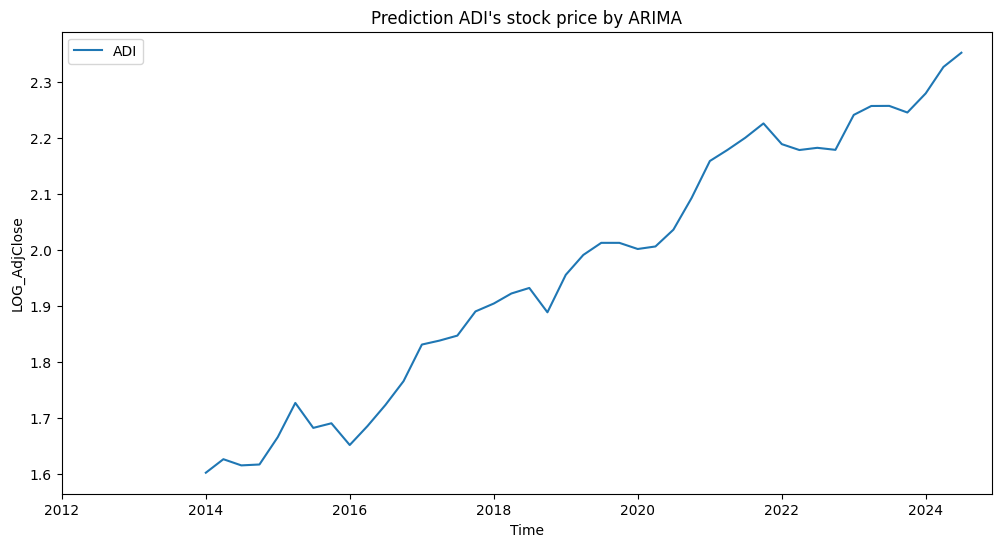

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(adi_data['LogAdjClose'], label='ADI')
plt.xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2024-12-01'))
plt.title("Prediction ADI's stock price by ARIMA")
plt.xlabel("Time")
plt.ylabel("LOG_AdjClose")
plt.legend()
plt.show()

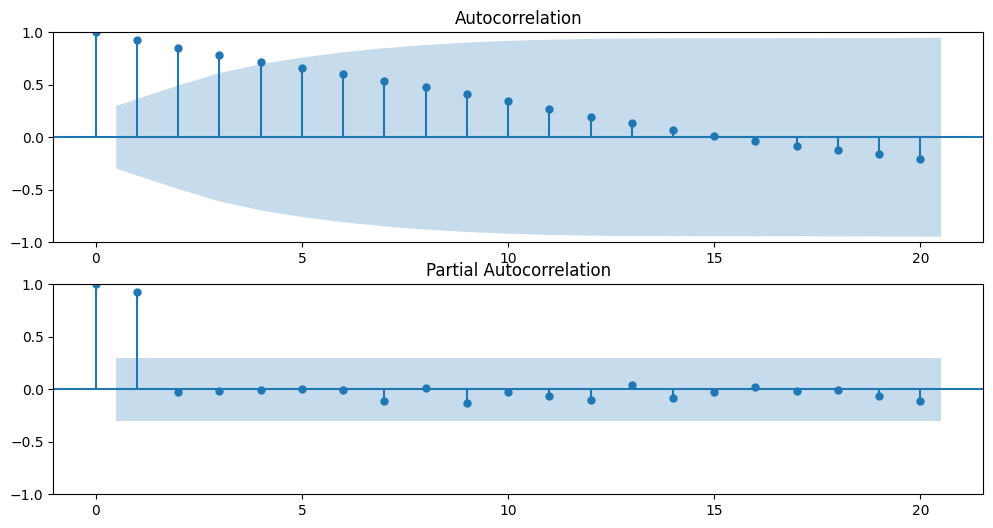

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(adi_data['LogAdjClose'], ax=plt.gca(), lags=20)
plt.subplot(212)
plot_pacf(adi_data['LogAdjClose'], ax=plt.gca(), lags=20)
plt.show()

In [9]:
result = adfuller(adi_data['LogAdjClose'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -0.29957230831694537
p-value: 0.925564884313159
Critical Values: {'1%': np.float64(-3.6155091011809297), '5%': np.float64(-2.941262357486514), '10%': np.float64(-2.6091995013850418)}


In [10]:
model = ARIMA(adi_data['LogAdjClose'], order=(15, 0, 6))  # Replace p, d, q with appropriate values
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

                               SARIMAX Results                                
Dep. Variable:            LogAdjClose   No. Observations:                   43
Model:                ARIMA(15, 0, 6)   Log Likelihood                  96.454
Date:                Mon, 18 Nov 2024   AIC                           -146.908
Time:                        14:14:54   BIC                           -106.401
Sample:                             0   HQIC                          -131.970
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9991      0.846      2.362      0.018       0.340       3.658
ar.L1         -0.1077      2.249     -0.048      0.962      -4.515       4.300
ar.L2         -0.0887      1.172     -0.076      0.9

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


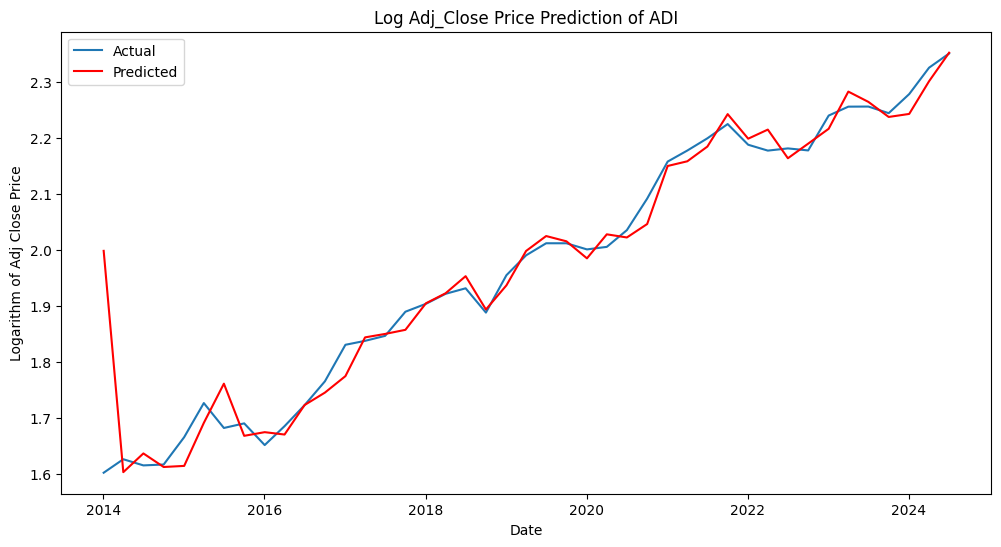

In [11]:
predictions = model_fit.predict()
plt.figure(figsize=(12, 6))
plt.plot(adi_data.index,adi_data['LogAdjClose'], label='Actual')
plt.plot(adi_data.index,predictions, label='Predicted', color='red')
plt.title('Log Adj_Close Price Prediction of ADI')
plt.xlabel('Date')
plt.ylabel('Logarithm of Adj Close Price')
plt.legend()
plt.show()

In [12]:
mae = mean_absolute_error(adi_data['LogAdjClose'], predictions)
mape = np.mean(np.abs((adi_data['LogAdjClose'] - predictions) / adi_data['LogAdjClose'])) * 100
r_squared = 1 - (np.sum((adi_data['LogAdjClose'] - predictions) ** 2) /
                 np.sum((adi_data['LogAdjClose'] - adi_data['LogAdjClose'].mean()) ** 2))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r_squared)

Mean Absolute Error (MAE): 0.028423072528379917
Mean Absolute Percentage Error (MAPE): 1.5780558294936828
R-squared: 0.918237039968291
